# Basic Multi-Path tests

Runs the following multi-path tests with MP-QUIC:
* Download of 5MB file using a single path
* Download of 5MB using multi-path with a RTT server scheduler
* Download of 5MB using multi-path with a Random server scheduler

(it takes some time, >7000 seconds in my iMAC)

In [1]:
!cd /App/mininettest && python mpTest.py

*** Error setting resource limits. Mininet's performance may be affected.
...
----------------------------------------------------------------------
Ran 3 tests in 7622.518s

OK


In [2]:
!ls /App/output/

example.txt
README.md
results-mp-quic-random-sch-2018-11-17-11:26:35.752465
results-mp-quic-rtt-sch-2018-11-17-11:05:30.707331
results-mp-quic-single-sch-2018-11-17-12:41:41.936967
thesis_output


In [3]:
import pandas

single = pandas.read_csv("/App/output/results-mp-quic-single-sch-2018-11-17-12:41:41.936967")
srtt = pandas.read_csv("/App/output/results-mp-quic-rtt-sch-2018-11-17-11:05:30.707331")
srandom = pandas.read_csv("/App/output/results-mp-quic-random-sch-2018-11-17-11:26:35.752465")

(30, 90)

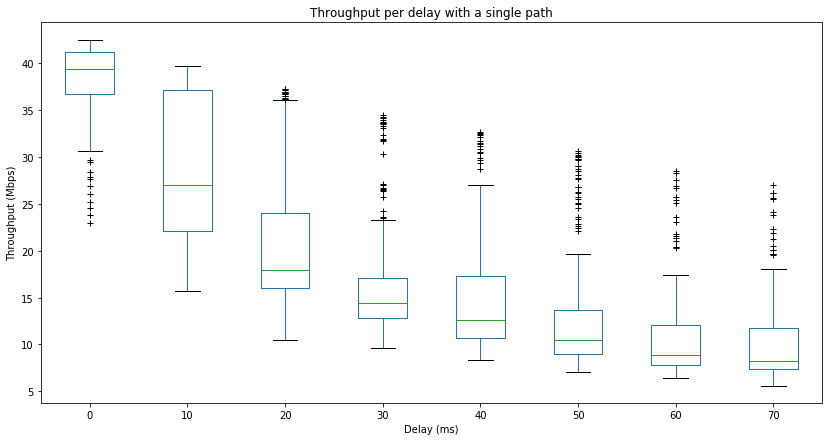

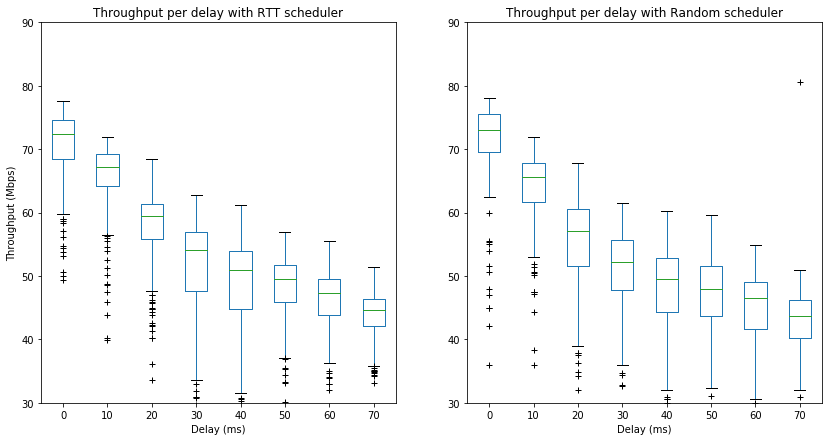

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(14, 7)

(5*8 / single).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Delay (ms)")
plt.title("Throughput per delay with a single path")

fig, axes = plt.subplots(nrows=1, ncols=2)

(5*8 / srtt).plot.box(sym='+', ax=axes[0])
axes[0].set_ylabel("Throughput (Mbps)")
axes[0].set_xlabel("Delay (ms)")
axes[0].set_title("Throughput per delay with RTT scheduler")
axes[0].set_ylim(30,90)

(5*8 / srandom).plot.box(sym='+', ax=axes[1])
plt.xlabel("Delay (ms)")
plt.title("Throughput per delay with Random scheduler")
axes[1].set_ylim(30,90)


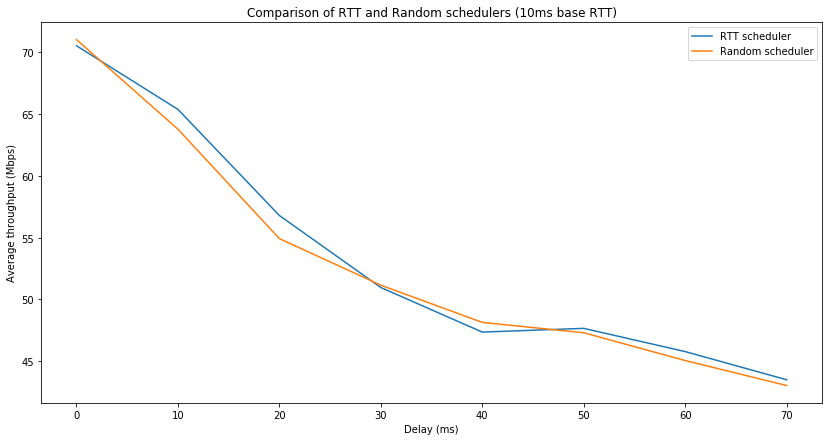

In [6]:
from IPython.core.pylabtools import figsize
figsize(14, 7)

plt.ylabel("Average throughput (Mbps)")
plt.xlabel("Delay (ms)")

average_srtt = (5*8/srtt).mean()
average_srandom = (5*8/srandom).mean()

plt.plot(average_srtt.index, average_srtt, label="RTT scheduler")
plt.plot(average_srandom.index, average_srandom, label="Random scheduler")

plt.legend()
plt.title("Comparison of RTT and Random schedulers (10ms base RTT)")
